<a href="https://colab.research.google.com/github/svetaepc/ds_py/blob/master/%D0%9F%D0%BE%D0%B4%D0%B1%D0%BE%D1%80_%D0%BF%D0%B0%D1%80%D0%B0%D0%BC%D0%B5%D1%82%D1%80%D0%BE%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://bit.ly/FEML-14-grid

# Подбор параметров

## Кросс-валидация

 ### Оценка параметров модели
 Нам нужно как-то оценивать качество создаваемых нами моделей. Идея тренировать и тестировать модели на одних и тех же данных - плохая (модели будут переобучаться).

Решение этой проблемы номер 1:

* Разделять данные на 2 группы: для обучения и тестирования

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

In [ ]:
# read in the iris data
iris = load_iris()

# create X (features) and y (response)
X = iris.data
y = iris.target

Сделаем 20 разных train_test_split и обучим на них KNN-классификатор. Оценим качество на тестовой выборке

In [ ]:
for i in range(20):
    X_tr, X_t, y_tr, y_t = train_test_split(X, y, random_state=i)
    knn = KNeighborsClassifier().fit(X_tr, y_tr)
    print(knn.score(X_t, y_t))

0.9736842105263158
1.0
1.0
0.9473684210526315
0.9736842105263158
0.9473684210526315
0.9736842105263158
0.8947368421052632
0.9210526315789473
1.0
0.9736842105263158
0.9736842105263158
0.9736842105263158
0.8947368421052632
0.9736842105263158
0.9736842105263158
0.9210526315789473
0.9473684210526315
1.0
0.9473684210526315


**Проблема** - качество модели имеет высокую дисперсию (high variance), т.к. примеры и в тестовой и в обучающей выборке могут значимо повлиять на полученную оценку

Решение - разобъем нашу выборку на несколько групп. Одну используем для теста, на остальных обучаем. После чего меняем группу для теста и повторяем. Усредняем полученное качество на каждой из выборок для оценки итогового качества модели

<img src="https://drive.google.com/uc?id=1CkcnP3NtVUyB47ThKvl_EsAQ-cXGMXjv" />

Сделаем cross_val_score для KNN

In [ ]:
from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores)
print(scores.mean())

[1.         0.93333333 1.         1.         0.86666667 0.93333333
 0.93333333 1.         1.         1.        ]
0.9666666666666668


## Подбор оптимального количестов соседей через CrossValidationScore

Подберем оптимальное количество соседей на основе cross_val_score

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np

for i in np.arange(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    print(i, ':', scores.mean(), scores.std())

1 : 0.96 0.05333333333333332
2 : 0.9533333333333334 0.052068331172711015
3 : 0.9666666666666666 0.04472135954999579
4 : 0.9666666666666666 0.04472135954999579
5 : 0.9666666666666668 0.04472135954999579
6 : 0.9666666666666668 0.04472135954999579
7 : 0.9666666666666668 0.04472135954999579
8 : 0.9666666666666668 0.04472135954999579
9 : 0.9733333333333334 0.03265986323710904
10 : 0.9666666666666668 0.04472135954999579
11 : 0.9666666666666668 0.04472135954999579
12 : 0.9733333333333334 0.03265986323710904
13 : 0.9800000000000001 0.030550504633038926
14 : 0.9733333333333334 0.04422166387140532
15 : 0.9733333333333334 0.03265986323710904
16 : 0.9733333333333334 0.03265986323710904
17 : 0.9733333333333334 0.03265986323710904
18 : 0.9800000000000001 0.030550504633038926
19 : 0.9733333333333334 0.03265986323710904
20 : 0.9800000000000001 0.030550504633038926
21 : 0.9666666666666666 0.033333333333333326
22 : 0.9666666666666666 0.033333333333333326
23 : 0.9733333333333334 0.03265986323710904
24 : 

## GridSearchCV
В некоторым смысле - эта функция более продвинутая версия цикла for, описанного выше

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
k_range = list(range(1, 31))
print(k_range)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [ ]:
param_grid = dict(n_neighbors=k_range)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [ ]:
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', n_jobs=-1)

Полученный объект будет перебирать параметр "количество соседей" у KNN, делать кросс-валидацию и оценивать качество, используя accuracy в качестве метрики.
n_jobs=-1 заставляет параллелить вычисления по всем ядрам вашего компьютера

In [ ]:
%%time
grid.fit(X, y)

CPU times: user 242 ms, sys: 54.2 ms, total: 296 ms
Wall time: 3.48 s


GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=29), n_jobs=-1,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='accuracy')

In [ ]:
import pandas as pd

pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001056,0.000150,0.002160,0.000299,1,{'n_neighbors': 1},1.000000,0.933333,1.0,0.933333,0.866667,1.000000,0.866667,1.000000,1.0,1.0,0.960000,0.053333,24
1,0.002118,0.001525,0.005931,0.003780,2,{'n_neighbors': 2},1.000000,0.933333,1.0,0.933333,0.866667,1.000000,0.866667,0.933333,1.0,1.0,0.953333,0.052068,27
2,0.001293,0.000654,0.004396,0.004359,3,{'n_neighbors': 3},1.000000,0.933333,1.0,0.933333,0.866667,1.000000,0.933333,1.000000,1.0,1.0,0.966667,0.044721,18
3,0.001147,0.000376,0.002607,0.000973,4,{'n_neighbors': 4},1.000000,0.933333,1.0,0.933333,0.866667,1.000000,0.933333,1.000000,1.0,1.0,0.966667,0.044721,18
4,0.001246,0.000444,0.004014,0.002089,5,{'n_neighbors': 5},1.000000,0.933333,1.0,1.000000,0.866667,0.933333,0.933333,1.000000,1.0,1.0,0.966667,0.044721,12
5,0.000919,0.000080,0.002017,0.000128,6,{'n_neighbors': 6},1.000000,0.933333,1.0,1.000000,0.866667,0.933333,0.933333,1.000000,1.0,1.0,0.966667,0.044721,12
6,0.001090,0.000210,0.003241,0.001739,7,{'n_neighbors': 7},1.000000,0.933333,1.0,1.000000,0.866667,0.933333,0.933333,1.000000,1.0,1.0,0.966667,0.044721,12
7,0.000901,0.000067,0.002233,0.000593,8,{'n_neighbors': 8},1.000000,0.933333,1.0,1.000000,1.000000,0.866667,0.933333,0.933333,1.0,1.0,0.966667,0.044721,12
8,0.000899,0.000072,0.002132,0.000339,9,{'n_neighbors': 9},1.000000,0.933333,1.0,1.000000,1.000000,0.933333,0.933333,0.933333,1.0,1.0,0.973333,0.032660,4
9,0.000915,0.000089,0.002414,0.001166,10,{'n_neighbors': 10},1.000000,0.933333,1.0,1.000000,1.000000,0.866667,0.933333,0.933333,1.0,1.0,0.966667,0.044721,12


In [ ]:
test_scores = grid.cv_results_['mean_test_score']
print(test_scores)

[0.96       0.95333333 0.96666667 0.96666667 0.96666667 0.96666667
 0.96666667 0.96666667 0.97333333 0.96666667 0.96666667 0.97333333
 0.98       0.97333333 0.97333333 0.97333333 0.97333333 0.98
 0.97333333 0.98       0.96666667 0.96666667 0.97333333 0.96
 0.96666667 0.96       0.96666667 0.95333333 0.95333333 0.95333333]


Text(0, 0.5, 'Cross-Validated Accuracy')

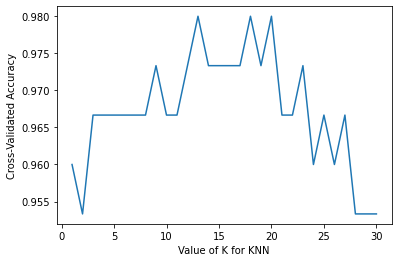

In [ ]:
plt.plot(k_range, test_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [ ]:
# Single best score achieved across all params (k)
print(grid.best_score_)

# Dictionary containing the parameters (k) used to generate that score
print(grid.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(grid.best_estimator_)

0.9800000000000001
{'n_neighbors': 13}
KNeighborsClassifier(n_neighbors=13)


Построим confusion_matrix для лучшего estimator'а

In [ ]:
from sklearn.metrics import confusion_matrix

pred = grid.best_estimator_.predict(X)

cm = confusion_matrix(y, pred)
cm

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0,  1, 49]])

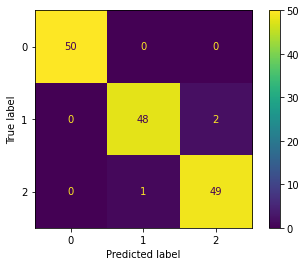

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay(cm).from_predictions(y, pred);

## Перебор нескольких параметров одновременно

Переберем параметры k (количество соседей) и weight (количество весов) одновременно

In [ ]:
%%time

param_grid = {'n_neighbors': np.arange(1, 30),
              'weights': ['uniform', 'distance']}

knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', n_jobs=-1)

grid.fit(X, y)

CPU times: user 399 ms, sys: 18.4 ms, total: 418 ms
Wall time: 3.01 s


GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
print(grid.best_score_)
print(grid.best_estimator_)

0.9800000000000001
KNeighborsClassifier(n_neighbors=13)


In [ ]:
pd.DataFrame(grid.cv_results_).shape

(58, 20)

## RandomizedSearch
GridSearch просто перебирает все параметры. Он, конечно, найдет их самое оптимальное значение, но вопрос во времени. Итоговое количество комбинаций для GridSearchCV - $N_1*N_2*N_3 * ... * N_K$, где $N_i$ - количество возможных значений $i$-го параметра

RandomizedSearchCV - выбирает случайные значения из параметров и пробует запускать обучение с ними. Можно попробовать "пристреляться" к оптимальным значениям, а затем запустить GridSearch для уточнения

Переберем параметры k (количество соседей) и weight (количество весов) одновременно при помощи RandomizedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
%%time

param_grid = {'n_neighbors': np.arange(1, 30),
              'weights': ['uniform', 'distance']}

knn = KNeighborsClassifier()
grid = RandomizedSearchCV(knn, param_grid, n_iter=10, cv=10, scoring='accuracy')

grid.fit(X, y)

CPU times: user 401 ms, sys: 7.85 ms, total: 409 ms
Wall time: 822 ms


RandomizedSearchCV(cv=10, estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                                        'weights': ['uniform', 'distance']},
                   scoring='accuracy')

In [ ]:
print(grid.best_score_)
print(grid.best_estimator_)

0.9800000000000001
KNeighborsClassifier(n_neighbors=13)


In [ ]:
pd.DataFrame(grid.cv_results_).shape

(10, 20)

## MNIST

In [ ]:
from sklearn.datasets import load_digits

In [ ]:
data = load_digits()

In [ ]:
X, y = data['data'], data['target']

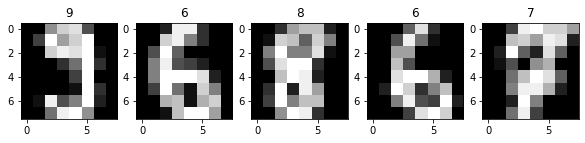

In [ ]:
fig = plt.figure(figsize=(10, 5))
for i in range(0, 5):
    img = np.random.choice(len(X))
    plt.subplot(1, 5, i + 1)
    plt.imshow(X[img].reshape(8, 8), cmap='gray')
    plt.title(y[img])
plt.show()

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=10)

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_valid = sc.transform(X_valid)

Возьмем 5 любых классификатор, подберем для них параметры и сравним итоговое качество на отложенной выборке

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from tqdm import tqdm

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
models=[
      {'name':'Lr',"model": LogisticRegression(max_iter=1000),
       'params':
              {'C':np.linspace(0, 10, 5),
                'penalty':['l1', 'l2', 'elasticnet', 'none'],
                'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
              }
      },
      {'name':'SVC',"model": SVC(), 
       'params':
              {'C': np.linspace(0, 10, 5),
               'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
               'degree':[1,2,3,5]
               }
       },
      {'name':'RF',"model": RandomForestClassifier(), 
       'params':
              {'n_estimators':[10,25,50,100,150,200],
               'criterion':['gini', 'entropy'],
               'max_depth':[3,5,7,9,11],
               'min_samples_leaf':[1,2,3,5]
               }
       },
      {'name':'KNN',"model": KNeighborsClassifier(), 
       'params':
              {'n_neighbors':list(range(1,30)),
               'weights': ['uniform', 'distance'],
               'p':[1,2,3],
               'metric':['euclidean', 'minkowski']
               }
       },
      {'name':'DT',"model": DecisionTreeClassifier(), 
       'params':
              {'criterion':['gini', 'entropy'],
               'max_depth':[3,5,7,9,11],
               'min_samples_split':[2,3,4,5,7,9],
               'min_samples_leaf':[1,2,3,5]
               }
       }
]

In [ ]:
%%time


res = []
for v in tqdm(models):
    res.append((v['name'], RandomizedSearchCV(v['model'], v['params'], cv=10).fit(X_train, y_train)))

100%|██████████| 5/5 [02:53<00:00, 34.69s/it]

CPU times: user 2min 36s, sys: 7.52 s, total: 2min 43s
Wall time: 2min 53s


In [ ]:
for r in res:
    print(r[0], r[1].best_score_, r[1].best_params_)

Lr 0.9637917637917637 {'solver': 'lbfgs', 'penalty': 'l2', 'C': 5.0}
SVC 0.9846833721833722 {'kernel': 'poly', 'degree': 3, 'C': 10.0}
RF 0.9735479797979798 {'n_estimators': 150, 'min_samples_leaf': 2, 'max_depth': 11, 'criterion': 'entropy'}
KNN 0.9700611888111889 {'weights': 'uniform', 'p': 1, 'n_neighbors': 10, 'metric': 'minkowski'}
DT 0.8510635198135199 {'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 9, 'criterion': 'entropy'}


In [ ]:
y_pred = res[1][1].best_estimator_.predict(X_valid)
wrong = y_pred != y_valid

X_wrong, y_wrong, y_true_wrong = X_valid[wrong], y_pred[wrong], y_valid[wrong] 

In [ ]:
y_true_wrong

array([9, 1, 1])

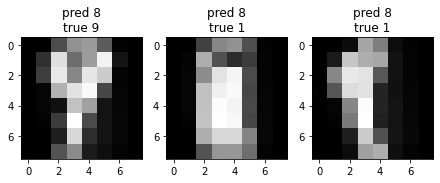

In [ ]:
X_wrong = sc.inverse_transform(X_wrong)

fig = plt.figure(figsize=(10, 5))
for i in range(0, 3):
    img = X_wrong[i]
    plt.subplot(1, 4, i + 1)
    plt.imshow(img.reshape(8, 8), cmap='gray')
    plt.title(f'pred {y_wrong[i]}\ntrue {y_true_wrong[i]}')
plt.show()

## Байесовская Оптимизация

Значения гиперпараметров в текущей итерации выбираются с учётом результатов на предыдущем шаге. Основная идея алгоритма заключается в следующем – на каждой итерации подбора находится компромисс между исследованием регионов с самыми удачными из найденных комбинаций гиперпараметров и исследованием регионов с большой неопределённостью (где могут находиться ещё более удачные комбинации). Это позволяет во многих случаях найти лучшие значения параметров модели за меньшее количество времени.

#### scikit-optimize

In [ ]:
!pip install scikit-optimize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 KB 3.3 MB/s eta 0:00:00


In [ ]:
%%time
from skopt import BayesSearchCV


opt = BayesSearchCV(
    SVC(),
    {
        'C': (1e-4, 1e+4, 'log-uniform'),
        'kernel': ['linear', 'poly', 'rbf'],
        'degree': (1, 8)
    },
    n_iter=32,
    cv=3
)

opt.fit(X_train, y_train)

CPU times: user 48.9 s, sys: 18.9 s, total: 1min 7s
Wall time: 54.5 s


BayesSearchCV(cv=3, estimator=SVC(), n_iter=32,
              search_spaces={'C': (0.0001, 10000.0, 'log-uniform'),
                             'degree': (1, 8),
                             'kernel': ['linear', 'poly', 'rbf']})

In [ ]:
opt.best_score_

0.9826026443980515

In [ ]:
opt.best_estimator_

SVC(C=0.0503663965981818, degree=1, kernel='linear')

In [ ]:
pd.DataFrame(opt.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_degree,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.157351,0.007259,0.036792,0.000500,0.000594,6,poly,"{'C': 0.0005944074204551244, 'degree': 6, 'ker...",0.106472,0.123173,0.123173,0.117606,0.007873,31
1,0.124850,0.031707,0.056349,0.014747,0.003867,5,rbf,"{'C': 0.0038665007351620546, 'degree': 5, 'ker...",0.104384,0.104384,0.104384,0.104384,0.000000,32
2,0.035802,0.001413,0.025789,0.000271,20.338429,5,rbf,"{'C': 20.33842897885524, 'degree': 5, 'kernel'...",0.981211,0.974948,0.983299,0.979819,0.003548,12
3,0.023314,0.001998,0.013985,0.001101,0.007641,7,linear,"{'C': 0.0076406690780804745, 'degree': 7, 'ker...",0.966597,0.962422,0.968685,0.965901,0.002604,25
4,0.050559,0.001828,0.013861,0.000418,12.345756,3,poly,"{'C': 12.345756174386802, 'degree': 3, 'kernel...",0.977035,0.989562,0.972860,0.979819,0.007097,21
5,0.086626,0.003876,0.021903,0.002109,3.141949,7,poly,"{'C': 3.1419489044113784, 'degree': 7, 'kernel...",0.461378,0.605428,0.496868,0.521225,0.061278,29
6,0.031574,0.001406,0.016520,0.000187,0.003374,1,linear,"{'C': 0.003374157242269676, 'degree': 1, 'kern...",0.956159,0.949896,0.951983,0.952679,0.002604,26
7,0.073422,0.003208,0.021872,0.000286,0.0002,8,linear,"{'C': 0.0001998196463823411, 'degree': 8, 'ker...",0.375783,0.388309,0.402923,0.389005,0.011091,30
8,0.040373,0.001347,0.028748,0.002440,6620.142476,7,rbf,"{'C': 6620.14247620561, 'degree': 7, 'kernel':...",0.981211,0.974948,0.983299,0.979819,0.003548,12
9,0.040375,0.003441,0.028281,0.000740,1141.717323,8,rbf,"{'C': 1141.7173228332972, 'degree': 8, 'kernel...",0.981211,0.974948,0.983299,0.979819,0.003548,12


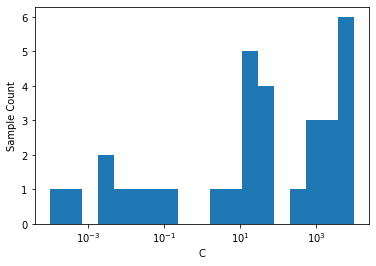

In [ ]:
from skopt.plots import plot_histogram

_ = plot_histogram(opt.optimizer_results_[0], 0)
plt.show()

### hyperopt

In [ ]:
from hyperopt import hp

In [ ]:
# пространство параметров для поиска
search_space = [
    hp.choice('degree', list(range(1, 8))),
    hp.choice('kernel', ['linear', 'poly', 'rbf']),
    hp.loguniform('C', -4, 4),
]                

In [ ]:
from hyperopt.pyll.stochastic import sample


samples = []

# Sample 10 values from the range
for _ in range(10):
    print(sample(search_space))

(2, 'poly', 2.0854726147502287)
(6, 'poly', 0.5050604908945733)
(2, 'rbf', 0.5395979985345818)
(5, 'poly', 2.446692013467132)
(1, 'poly', 14.137973550000515)
(4, 'poly', 25.616688816233765)
(2, 'poly', 3.5649636957185815)
(3, 'rbf', 0.08589892331301029)
(1, 'poly', 0.10814239891951295)
(1, 'poly', 14.150899583890336)


In [ ]:
def objective(params):
    svc = SVC(degree=params[0], kernel=params[1], C=params[2])
    scores = cross_val_score(svc, X, y, cv=10, scoring="accuracy")
    return -scores.mean()

In [ ]:
from hyperopt import rand, tpe
from hyperopt import Trials

# Create the algorithms
tpe_algo = tpe.suggest  # байесовская оптимизация
rand_algo = rand.suggest  # случайный поиск по сетке

# Create two trials objects
tpe_trials = Trials()
rand_trials = Trials()

In [ ]:
from hyperopt import fmin

# Run 25 evals with the tpe algorithm
tpe_best = fmin(fn=objective,
                space=search_space,
                algo=tpe_algo,  # алгоритм сэмплирования
                trials=tpe_trials,  # функция для фиксирования результатов
                max_evals=25,
                return_argmin=False
                )

100%|██████████| 25/25 [00:21<00:00,  1.19it/s, best loss: -0.9821818746120423]


In [ ]:
print(tpe_best)

(7, 'rbf', 8.864422413164881)


In [ ]:
# Run 25 evals with the random algorithm
rand_best = fmin(fn=objective, space=search_space, algo=rand_algo, trials=rand_trials, 
                 max_evals=10, rstate=np.random.RandomState(5), return_argmin=False)

100%|██████████| 10/10 [00:09<00:00,  1.04it/s, best loss: -0.9799627560521416]


In [ ]:
print(rand_best)

(1, 'rbf', 2.776552599719887)


https://github.com/hyperopt/hyperopt


https://habr.com/ru/company/antiplagiat/blog/528384/

### optuna

In [ ]:
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.3/365.3 KB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.6/210.6 KB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 KB 7.6 MB/s eta 0:00:00


In [ ]:
import optuna
from optuna import Trial, visualization
from optuna.samplers import TPESampler

In [ ]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [ ]:
def scorer(model, X, y):
    return accuracy_score(y, model.predict(X)) 

In [ ]:
def objective(trial, X, y):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 10, 200, step=25),
        'max_depth': trial.suggest_int('max_depth', 1, 11)
    }
    model = RandomForestClassifier(n_estimators=param['n_estimators'], max_depth=param['max_depth']).fit(X, y)
    return cross_val_score(model, X, y, cv=10, scoring=scorer).mean()

In [ ]:
study = optuna.create_study(direction='maximize', sampler=TPESampler())
study.optimize(lambda trial: objective(trial, X, y), n_trials=50)

[I 2023-02-13 13:21:27,857] A new study created in memory with name: no-name-c4752c4e-b2a1-4066-804e-3ce0afba3508
[I 2023-02-13 13:21:28,150] Trial 0 finished with value: 0.6911607697082558 and parameters: {'n_estimators': 10, 'max_depth': 2}. Best is trial 0 with value: 0.6911607697082558.
[I 2023-02-13 13:21:28,617] Trial 1 finished with value: 0.9126381129733087 and parameters: {'n_estimators': 10, 'max_depth': 9}. Best is trial 1 with value: 0.9126381129733087.
[I 2023-02-13 13:21:34,358] Trial 2 finished with value: 0.9237306021104903 and parameters: {'n_estimators': 160, 'max_depth': 6}. Best is trial 2 with value: 0.9237306021104903.
[I 2023-02-13 13:21:41,293] Trial 3 finished with value: 0.8898075729360647 and parameters: {'n_estimators': 135, 'max_depth': 4}. Best is trial 2 with value: 0.9237306021104903.
[I 2023-02-13 13:21:43,801] Trial 4 finished with value: 0.9432278088144009 and parameters: {'n_estimators': 60, 'max_depth': 9}. Best is trial 4 with value: 0.943227808814

In [ ]:
trial = study.best_trial

print('Accuracy: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

Accuracy: 0.9521384233395406
Best hyperparameters: {'n_estimators': 85, 'max_depth': 11}


In [ ]:
optuna.visualization.plot_optimization_history(study)

Метрика точности для каждого гиперпараметра для каждого запуска

In [ ]:
optuna.visualization.plot_slice(study)

Плоскость метрики точности для гиперпараметров

In [ ]:
optuna.visualization.plot_contour(study, params=['n_estimators', 'max_depth'])

## **Дополнительные материалы:**

1. KNN weights uniform - https://youtu.be/m_bWhOLr_XM
2. KNN weights distance - https://youtu.be/s5Ms80gpbmA
3. Weighted усреднение метрики - https://youtu.be/i1G5F2jOspE